In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Perceptrons

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=200, tol=-np.infty, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([1])

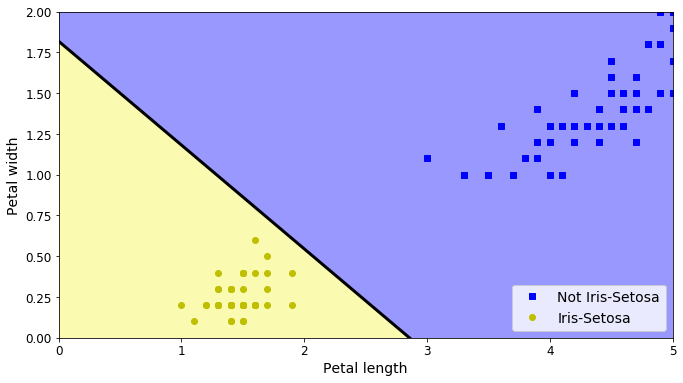

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]

x0,x1 = np.meshgrid(np.linspace(axes[0],axes[1],500).reshape(-1,1),
                    np.linspace(axes[2],axes[3],200).reshape(-1,1))

X_new = np.c_[x0.ravel(),x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(11, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0],axes[1]],[a*axes[0] + b,a*axes[1]+b],"k-",linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [6]:
per_clf.intercept_

array([4.])

In [7]:
x0

array([[0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       ...,
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ],
       [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
        5.        ]])

In [8]:
x1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01005025, 0.01005025, 0.01005025, ..., 0.01005025, 0.01005025,
        0.01005025],
       [0.0201005 , 0.0201005 , 0.0201005 , ..., 0.0201005 , 0.0201005 ,
        0.0201005 ],
       ...,
       [1.9798995 , 1.9798995 , 1.9798995 , ..., 1.9798995 , 1.9798995 ,
        1.9798995 ],
       [1.98994975, 1.98994975, 1.98994975, ..., 1.98994975, 1.98994975,
        1.98994975],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

# Activation Functions

In [9]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

def relu(z):
    return(np.maximum(0,z))

def derivative(f,z,eps =0.000001):
    return((f(z+eps) -f(z-eps)) / (2*eps))

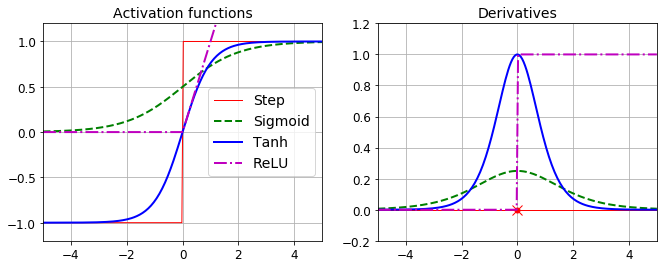

In [10]:
z = np.linspace(-5,5,200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [11]:
def heaviside(z):
    return((z>=0).astype(z.dtype))

def mlp_xor(x1,x2,activation=heaviside):
    return(activation(-activation(x1 + x2 - 1.5) +activation(x1 + x2 - 0.5)-0.5))

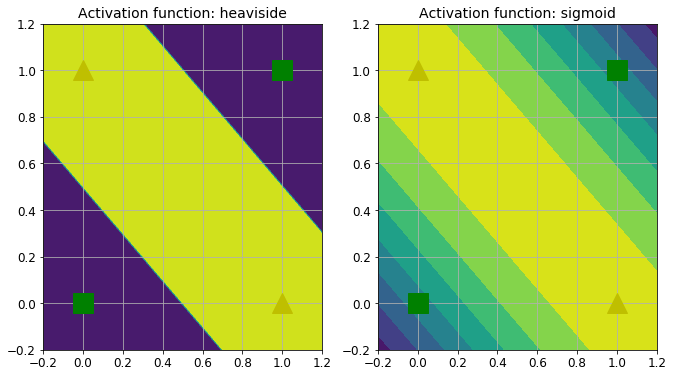

In [12]:
x1s = np.linspace(-0.2,1.2,100)
x2s = np.linspace(-0.2,1.2,100)
x1,x2 = np.meshgrid(x1s,x2s)

z1 = mlp_xor(x1,x2,activation=heaviside)
z2 = mlp_xor(x1,x2,activation=sigmoid)

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)


# FNN for MNIST

### Using the estimator APR (formerly tf.contrib.learn)

In [13]:
import tensorflow as tf

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]


In [15]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_r/6zx5d9bd4y354gsz3qksysch0000gn/T/tmpdc7qzgut', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a4e008358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions f

INFO:tensorflow:loss = 0.7705593, step = 4101 (0.411 sec)
INFO:tensorflow:global_step/sec: 243.123
INFO:tensorflow:loss = 2.47184, step = 4201 (0.411 sec)
INFO:tensorflow:global_step/sec: 244.902
INFO:tensorflow:loss = 0.70992404, step = 4301 (0.408 sec)
INFO:tensorflow:global_step/sec: 241.361
INFO:tensorflow:loss = 2.8760686, step = 4401 (0.414 sec)
INFO:tensorflow:global_step/sec: 243.68
INFO:tensorflow:loss = 0.56685996, step = 4501 (0.410 sec)
INFO:tensorflow:global_step/sec: 242.318
INFO:tensorflow:loss = 8.336188, step = 4601 (0.413 sec)
INFO:tensorflow:global_step/sec: 243.084
INFO:tensorflow:loss = 0.36029977, step = 4701 (0.411 sec)
INFO:tensorflow:global_step/sec: 245.972
INFO:tensorflow:loss = 0.46163416, step = 4801 (0.406 sec)
INFO:tensorflow:global_step/sec: 250.204
INFO:tensorflow:loss = 0.571499, step = 4901 (0.400 sec)
INFO:tensorflow:global_step/sec: 245.946
INFO:tensorflow:loss = 0.5560045, step = 5001 (0.407 sec)
INFO:tensorflow:global_step/sec: 245.366
INFO:tensor

INFO:tensorflow:global_step/sec: 214.387
INFO:tensorflow:loss = 0.24393642, step = 12401 (0.466 sec)
INFO:tensorflow:global_step/sec: 216.462
INFO:tensorflow:loss = 0.28940552, step = 12501 (0.462 sec)
INFO:tensorflow:global_step/sec: 226.426
INFO:tensorflow:loss = 0.058657154, step = 12601 (0.442 sec)
INFO:tensorflow:global_step/sec: 230.276
INFO:tensorflow:loss = 0.08925366, step = 12701 (0.434 sec)
INFO:tensorflow:global_step/sec: 232.847
INFO:tensorflow:loss = 0.12489044, step = 12801 (0.429 sec)
INFO:tensorflow:global_step/sec: 233.714
INFO:tensorflow:loss = 0.3556719, step = 12901 (0.428 sec)
INFO:tensorflow:global_step/sec: 226.931
INFO:tensorflow:loss = 0.04025813, step = 13001 (0.441 sec)
INFO:tensorflow:global_step/sec: 231.267
INFO:tensorflow:loss = 0.046587575, step = 13101 (0.432 sec)
INFO:tensorflow:global_step/sec: 233.077
INFO:tensorflow:loss = 0.029610973, step = 13201 (0.429 sec)
INFO:tensorflow:global_step/sec: 235.361
INFO:tensorflow:loss = 0.47400224, step = 13301 

INFO:tensorflow:global_step/sec: 199.685
INFO:tensorflow:loss = 0.017813208, step = 20501 (0.502 sec)
INFO:tensorflow:global_step/sec: 204.501
INFO:tensorflow:loss = 0.07892036, step = 20601 (0.488 sec)
INFO:tensorflow:global_step/sec: 216.429
INFO:tensorflow:loss = 0.0018574595, step = 20701 (0.462 sec)
INFO:tensorflow:global_step/sec: 212.577
INFO:tensorflow:loss = 0.004067496, step = 20801 (0.470 sec)
INFO:tensorflow:global_step/sec: 190.108
INFO:tensorflow:loss = 0.050339513, step = 20901 (0.526 sec)
INFO:tensorflow:global_step/sec: 200.508
INFO:tensorflow:loss = 0.027221402, step = 21001 (0.499 sec)
INFO:tensorflow:global_step/sec: 183.643
INFO:tensorflow:loss = 0.0792752, step = 21101 (0.544 sec)
INFO:tensorflow:global_step/sec: 198.092
INFO:tensorflow:loss = 0.009776761, step = 21201 (0.507 sec)
INFO:tensorflow:global_step/sec: 192.592
INFO:tensorflow:loss = 0.06109421, step = 21301 (0.517 sec)
INFO:tensorflow:global_step/sec: 199.154
INFO:tensorflow:loss = 0.1061303, step = 214

INFO:tensorflow:global_step/sec: 226.595
INFO:tensorflow:loss = 0.0134577295, step = 28601 (0.441 sec)
INFO:tensorflow:global_step/sec: 228.936
INFO:tensorflow:loss = 0.0049743056, step = 28701 (0.437 sec)
INFO:tensorflow:global_step/sec: 193.707
INFO:tensorflow:loss = 0.009543224, step = 28801 (0.517 sec)
INFO:tensorflow:global_step/sec: 214.833
INFO:tensorflow:loss = 0.071521275, step = 28901 (0.465 sec)
INFO:tensorflow:global_step/sec: 207.22
INFO:tensorflow:loss = 0.029324187, step = 29001 (0.483 sec)
INFO:tensorflow:global_step/sec: 228.923
INFO:tensorflow:loss = 0.10645564, step = 29101 (0.437 sec)
INFO:tensorflow:global_step/sec: 229.916
INFO:tensorflow:loss = 0.023539267, step = 29201 (0.435 sec)
INFO:tensorflow:global_step/sec: 232.253
INFO:tensorflow:loss = 0.027786678, step = 29301 (0.431 sec)
INFO:tensorflow:global_step/sec: 222.648
INFO:tensorflow:loss = 0.04129921, step = 29401 (0.449 sec)
INFO:tensorflow:global_step/sec: 230.751
INFO:tensorflow:loss = 0.023739478, step =

INFO:tensorflow:global_step/sec: 215.147
INFO:tensorflow:loss = 0.038231738, step = 36701 (0.464 sec)
INFO:tensorflow:global_step/sec: 229.679
INFO:tensorflow:loss = 0.040749855, step = 36801 (0.436 sec)
INFO:tensorflow:global_step/sec: 232.141
INFO:tensorflow:loss = 0.014757642, step = 36901 (0.431 sec)
INFO:tensorflow:global_step/sec: 230.189
INFO:tensorflow:loss = 0.033547632, step = 37001 (0.434 sec)
INFO:tensorflow:global_step/sec: 229.166
INFO:tensorflow:loss = 0.003279837, step = 37101 (0.436 sec)
INFO:tensorflow:global_step/sec: 227.019
INFO:tensorflow:loss = 0.022593435, step = 37201 (0.441 sec)
INFO:tensorflow:global_step/sec: 224.637
INFO:tensorflow:loss = 0.020259779, step = 37301 (0.445 sec)
INFO:tensorflow:global_step/sec: 218.142
INFO:tensorflow:loss = 0.025421012, step = 37401 (0.459 sec)
INFO:tensorflow:global_step/sec: 214.409
INFO:tensorflow:loss = 0.016887981, step = 37501 (0.466 sec)
INFO:tensorflow:global_step/sec: 213.134
INFO:tensorflow:loss = 0.018131552, step 

In [19]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test},y=y_test,shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-31T10:58:46Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/6zx5d9bd4y354gsz3qksysch0000gn/T/tmpdc7qzgut/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-31-10:58:47
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9802, average_loss = 0.10449389, global_step = 44000, loss = 13.227076
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/_r/6zx5d9bd4y354gsz3qksysch0000gn/T/tmpdc7qzgut/model.ckpt-44000


In [20]:
eval_results

{'accuracy': 0.9802,
 'average_loss': 0.10449389,
 'loss': 13.227076,
 'global_step': 44000}

In [25]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/6zx5d9bd4y354gsz3qksysch0000gn/T/tmpdc7qzgut/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -5.4148164 ,   2.360558  ,   0.44142213,   4.023853  ,
         -1.157204  , -11.117194  , -19.40847   ,  27.538633  ,
         -8.481416  ,   1.6090264 ], dtype=float32),
 'probabilities': array([4.8808884e-15, 1.1622528e-11, 1.7054164e-12, 6.1328283e-11,
        3.4479133e-13, 1.6292503e-17, 4.0844272e-21, 1.0000000e+00,
        2.2734796e-16, 5.4816919e-12], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

In [21]:
test_input_fn

<function tensorflow_estimator.python.estimator.inputs.numpy_io.numpy_input_fn.<locals>.input_fn()>

# Using plain tensorflow

In [26]:
import tensorflow as tf

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10


In [27]:
reset_graph()

In [28]:
X = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')
y = tf.placeholder(tf.int32,shape=(None),name="y")

In [29]:
def neuron_layer(X,n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]),name='bias')
        Z = tf.matmul(X,W) + b
        if activation is not None:
            return(activation(Z))
        else:
            return(Z)

Lets go over this line by line
* 1. create a name scope using the name of the layer, just to make tensorboard look fancy
* next we get the number of inputs by looking up the input matrix's shape and getting the size of the second dimension
* create W, to hold the weights, also called the layer's kernel. It will be initialized randomly using a truncated norm. this helps for convergence
* it is important to initialize weights random;y to avoid any symmetry tah the gradient decent algorithm would be unable to break
* created a line for bias, one for each neuron
* copmute the matrix equation subgraph $Z = XW + b$
* b is a 1d tensor and XW is a 2d tensor
* pass into the activation function before softmax

### Create the layers

In [30]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X,n_hidden1,name='hidden1',
                          activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1,n_hidden2,name='hidden2',
                          activation=tf.nn.relu)
    logits = neuron_layer(hidden2,n_outputs,name="outputs")

In [31]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    loss = tf.reduce_mean(xentropy,name='loss')

In [32]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [33]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [34]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [35]:
n_epochs = 40
batch_size = 50

In [36]:
#def pull random batch function
def shuffle_batch(X,y,batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx,n_batches):
        X_batch,y_batch = X[batch_idx], y[batch_idx]
        yield(X_batch,y_batch)

In [37]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9148
1 Batch accuracy: 0.92 Val accuracy: 0.9358
2 Batch accuracy: 0.96 Val accuracy: 0.9448
3 Batch accuracy: 0.92 Val accuracy: 0.9512
4 Batch accuracy: 0.98 Val accuracy: 0.956
5 Batch accuracy: 0.96 Val accuracy: 0.9568
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9648
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.9688
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9704
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.9738
16 Batch accuracy: 1.0 Val accuracy: 0.9732
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9748
19 Batch accuracy: 0.98 Val accuracy: 0.9744
20 Batch accuracy: 1.0 Val accuracy: 0.9752
21 Batch accuracy: 1.0 Val accuracy: 0.9756
22 Batch accuracy: 0.98 Val accu

In [41]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = X_test[:30]
    Z = logits.eval(feed_dict={X:X_new_scaled})
    y_pred = np.argmax(Z,axis=1)
    

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [42]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:30])

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [45]:
from __future__ import absolute_import, division, print_function, unicode_literals

# This module defines the show_graph() function to visualize a TensorFlow graph within Jupyter.

# As far as I can tell, this code was originally written by Alex Mordvintsev at:
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

# The original code only worked on Chrome (because of the use of <link rel="import"...>, but the version below
# uses Polyfill (copied from this StackOverflow answer: https://stackoverflow.com/a/41463991/38626)
# so that it can work on other browsers as well.

import numpy as np
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [46]:
show_graph(tf.get_default_graph())

### Using dense() instead of neuron_layer()

Note: previous releases of the book used .contrib.layers.fully_connected() and layers.dense() (which did not exsist this chapter was written). It is now preferable to use .layer because anything in the contrib module may change or be delted without notice. The dense() functino is almost identical to the fully_connected() fun tion, eexcepy for a few minor differences.


In [53]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [57]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None,n_inputs),name='X')
y = tf.placeholder(tf.int32,shape=(None),name='y')

In [58]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [59]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [60]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [61]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [62]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [63]:
n_epochs = 30
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.9622
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9654
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9686
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.973
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.975
19 Batch accuracy: 0.98 Valida

In [64]:
show_graph(tf.get_default_graph())

Train a deep MLP on the MNSIT dataset and see if you can get over  98% precision. Just like in the last exercise of Chatper 9, try adding all the bells and whistles.

First, lets create the deepnet. It's exaclty the same as earlier, with just one addtion, we add a tf.summary.scalar() to track the loss and accuracy during the training, so we can view nice learing curves using TensorBoard

In [65]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [66]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")


In [67]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                             logits=logits)
    loss = tf.reduce_mean(xentropy,name='loss')
    loss_summary = tf.summary.scalar('log_loss',loss)

In [68]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [69]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits,y,1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    accuracy_summary = tf.summary.scalar("accuracy",accuracy)

In [70]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard with logs

In [71]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)


In [72]:
logdir = log_dir("mnist_dnn")

In [77]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())


Try implementing early stopping!

In [78]:
m,n = X_train.shape

In [79]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.260% 	Loss: 0.35363
Epoch: 5 	Validation accuracy: 95.180% 	Loss: 0.17470
Epoch: 10 	Validation accuracy: 96.500% 	Loss: 0.12654
Epoch: 15 	Validation accuracy: 97.240% 	Loss: 0.10378
Epoch: 20 	Validation accuracy: 97.340% 	Loss: 0.09237
Epoch: 25 	Validation accuracy: 97.700% 	Loss: 0.08139
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07621
Epoch: 35 	Validation accuracy: 97.960% 	Loss: 0.07273
Epoch: 40 	Validation accuracy: 97.980% 	Loss: 0.06931
Epoch: 45 	Validation accuracy: 98.020% 	Loss: 0.06761
Epoch: 50 	Validation accuracy: 98.100% 	Loss: 0.06648
Epoch: 55 	Validation accuracy: 98.080% 	Loss: 0.06573
Epoch: 60 	Validation accuracy: 98.100% 	Loss: 0.06672
Epoch: 65 	Validation accuracy: 98.080% 	Loss: 0.06740
Epoch: 70 	Validation accuracy: 98.160% 	Loss: 0.06721
Epoch: 75 	Validation accuracy: 98.100% 	Loss: 0.06638
Epoch: 80 	Validation accuracy: 98.160% 	Loss: 0.06569
Epoch: 85 	Validation accuracy: 98.140% 	Loss: 0.06722
Epoch: 90 	V

In [80]:
os.remove(checkpoint_epoch_path)

In [81]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    acc_val = accuracy.eval(feed_dict={X:X_test,y:y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [82]:
accuracy_val

0.9818

In [83]:
acc_val

0.9791